<a href="https://colab.research.google.com/github/RohitNale/Market-Segmentation-Analysis/blob/main/Market_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read and Explore Data

In [ ]:
import os

# linear algebra & data processing 
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(1234)

In [ ]:
# read Fast Food data
data = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
# replace Yes - 1 & No - 0
replace_values = dict(Yes=1, No=0)
for col in data.columns:
  data = data.replace({col: replace_values})

In [ ]:
# replace Like to numerical values
data.loc[data["Like"] == 'I love it!+5', "Like"] = '+5'
data.loc[data["Like"] == 'I hate it!-5', "Like"] = '-5'

data["Like"] = data["Like"].astype(int)

# data['Like'] = LabelEncoder().fit_transform(data['Like'])

In [ ]:
# replace Visitfrequency to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

replace_vf = {'Every three months': 3, 
              'More than once a week': 6,
              'Never': 1,
              'Once a month': 4,
              'Once a week': 5,
              'Once a year': 2}

data['VisitFrequency'] = data['VisitFrequency'].replace(replace_vf)

# le.fit(data.VisitFrequency.unique())

# data['VisitFrequency'] = le.transform(data['VisitFrequency'])
# list(le.classes_)

# data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])

In [ ]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,3,Female
1,1,1,0,1,1,1,1,1,1,0,0,2,51,3,Female
2,0,1,1,1,1,1,0,1,1,1,0,1,62,3,Female
3,1,1,0,1,1,1,1,1,0,0,1,4,69,5,Female
4,0,1,0,1,1,1,1,0,0,1,0,2,49,4,Male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   int64 
 14  Gender          1453 non-null   object
dtypes: int64(14), object(1)
memory usage: 170.4+ KB


In [ ]:
print(pd.isnull(data).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


In [ ]:
data.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,0.777013,44.604955,3.383345
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.116842,14.221178,1.292987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,18.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,33.000000,2.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,45.000000,4.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,57.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,6.000000


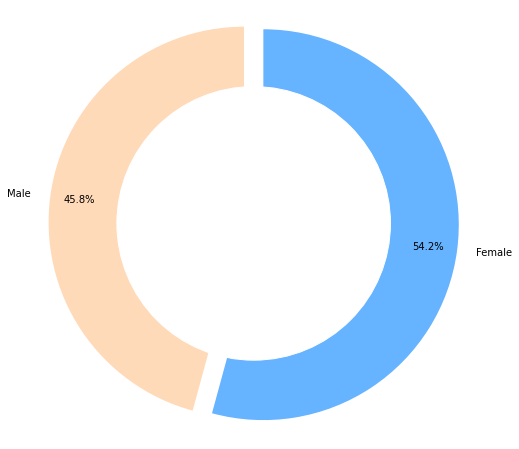

In [ ]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
# replace Gender to numerical
replace_gender = dict(Female=1, Male=0)
data['Gender'] = data['Gender'].replace(replace_gender)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


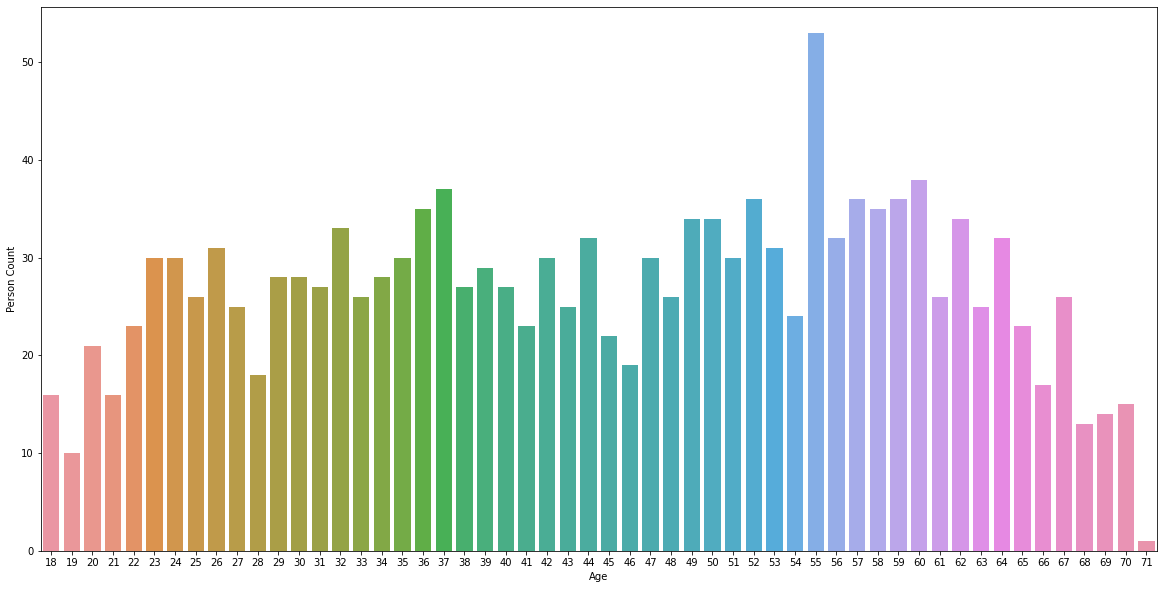

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

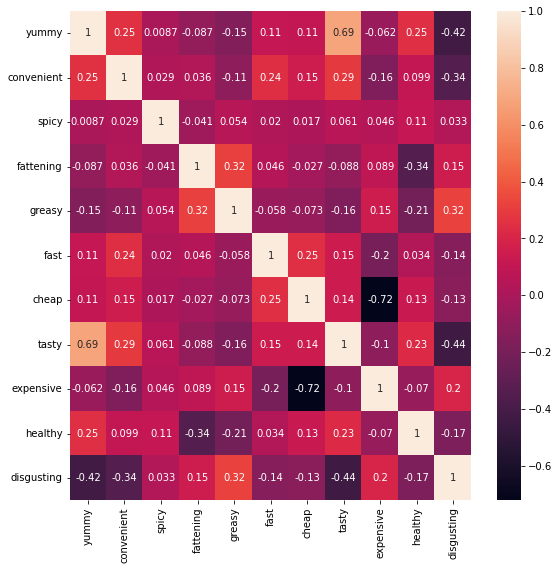

In [ ]:
# plot correlation between variables
df = data.drop(["Like",	"Age", "VisitFrequency", "Gender"], axis = 1)
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Principal components analysis (PCA)

Principal components analysis (PCA) is an unsupervised machine learning technique that finds principal components (linear combinations of the predictor variables) that explain a large portion of the variation in a dataset.

The loadings are from a numerical point of view, equal to the coefficients of the variables, and provide information about which variables give the largest contribution to the components.

In [ ]:
!pip install pca # https://erdogant.github.io/pca/pages/html/index.html
from pca import pca

In [ ]:
model = pca(normalize=False, n_components=None)
results = model.fit_transform(df)
model.results['topfeat']

[pca] >n_components is set to 10
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [11] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


,PC,feature,loading,type
0,PC1,yummy,-0.476933,best
1,PC2,cheap,-0.610633,best
2,PC3,greasy,-0.802373,best
3,PC4,healthy,0.763488,best
4,PC5,disgusting,-0.729209,best
5,PC6,fast,-0.594632,best
6,PC7,spicy,0.707637,best
7,PC8,fast,-0.627799,best
8,PC9,tasty,-0.639086,best
9,PC10,convenient,-0.665818,best


When we perform PCA, we’re interested in understanding what percentage of the total variation in the dataset can be explained by each principal component.

One of the easiest ways to visualize the percentage of variation explained by each principal component is to create a scree plot.

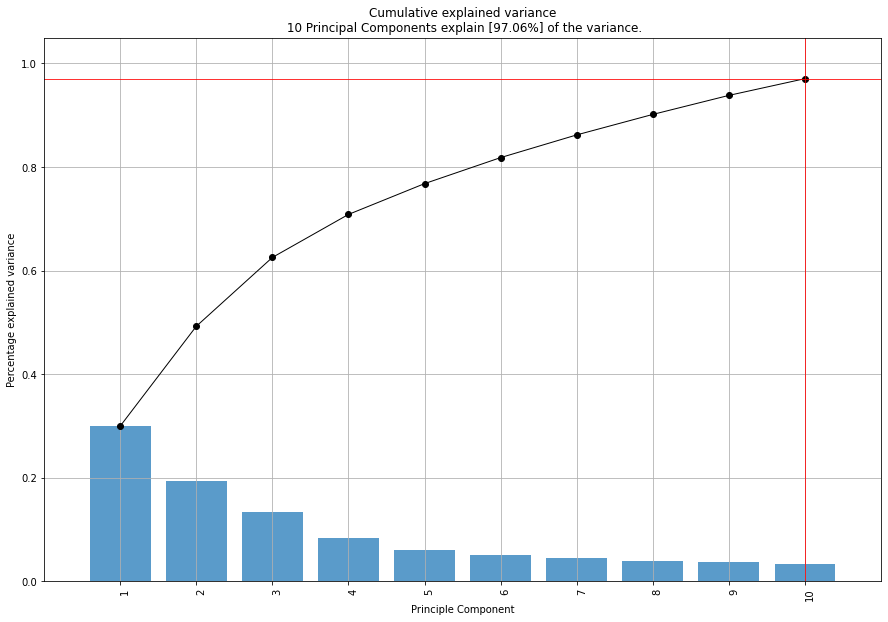

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f01f2fd17d0>)

<Figure size 432x288 with 0 Axes>

In [ ]:
model.plot() # scree plot

[pca] >Plot PC1 vs PC2 with loadings.


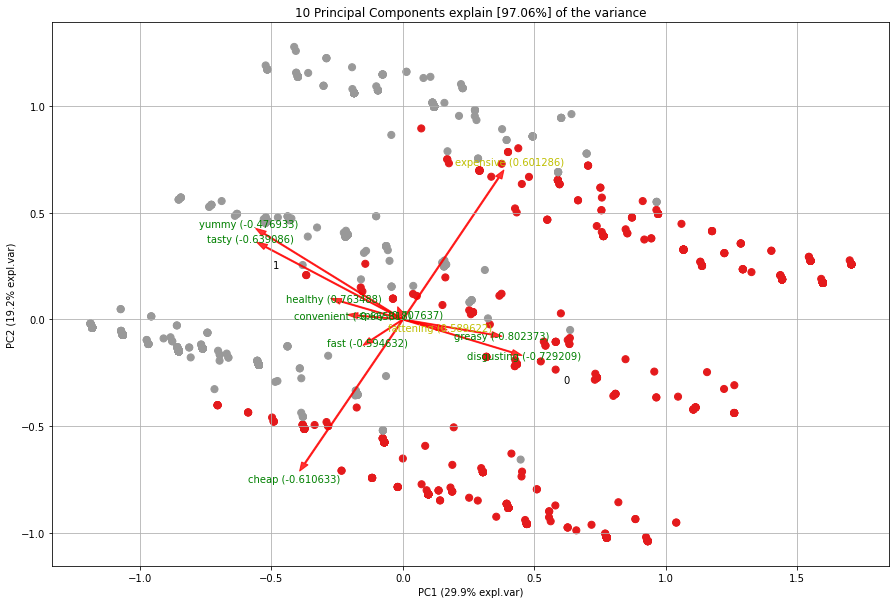

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f01f2f1b350>)

In [ ]:
model.biplot(y=df['yummy'].values, legend=False,) # Biplot for PC1(yummy)

# Implement Clustering Algorithms

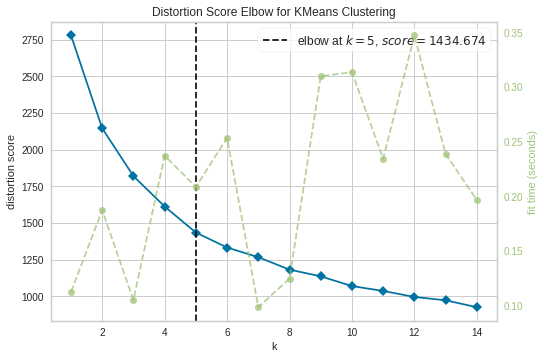

In [ ]:
# Using k-Means

# clustering model library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

#create model
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15)).fit(df)
visualizer.show()

In [ ]:
# Create clusters 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)
data['cluster_num'] = kmeans.labels_
print(data.cluster_num.value_counts())
data.head()

1    580
0    323
2    304
3    246
Name: cluster_num, dtype: int64


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,3,1,2
1,1,1,0,1,1,1,1,1,1,0,0,2,51,3,1,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,3,1,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,5,1,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,4,0,2


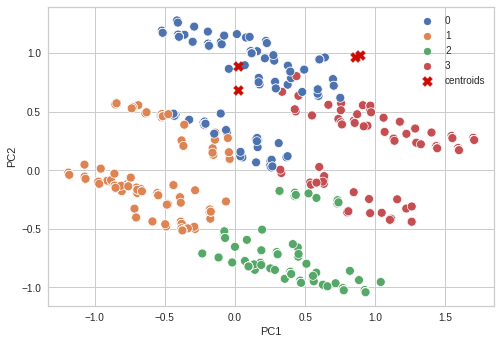

In [ ]:
#Visulazing clusters
sns.scatterplot(data=results['PC'], x='PC1', y='PC2', hue=data['cluster_num'], s=80, palette="deep")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=100, label="centroids")
plt.legend()
plt.show()

# Describing Segments

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


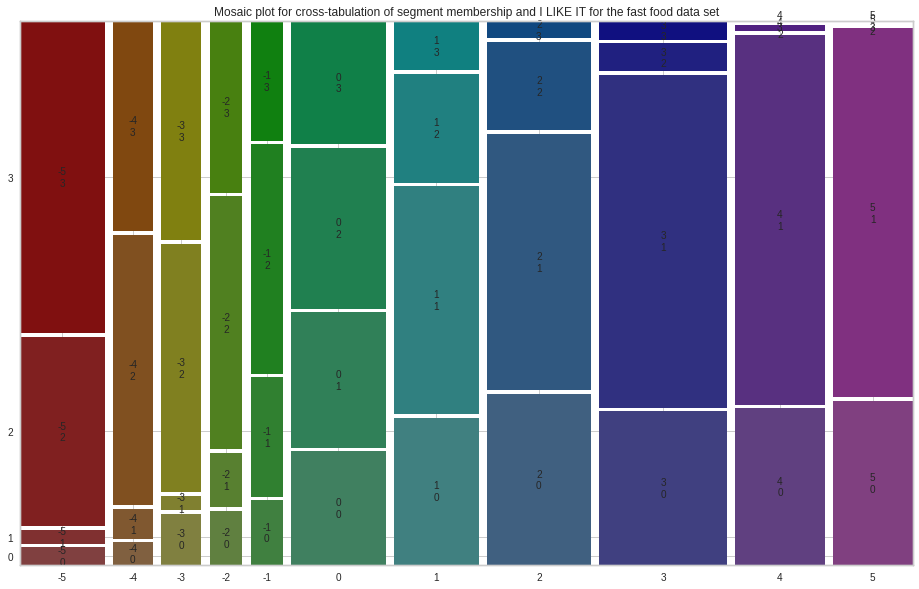

In [ ]:
# mosaic plot
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['figure.figsize'] = (16, 10)
# plt.set_cmap('bwr')

crosstab = pd.crosstab(data['Like'], data['cluster_num'])
mosaic(crosstab.stack(), gap=0.01,
       title="Mosaic plot for cross-tabulation of segment membership and I LIKE IT for the fast food data set")
plt.show()

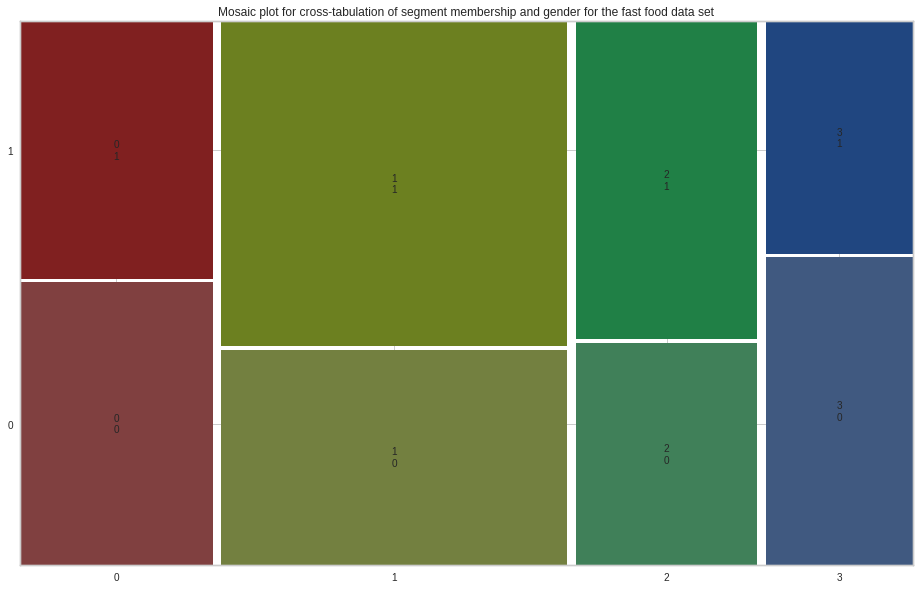

In [ ]:
# mosaic plot gender vs segment

# plt.rcParams['figure.figsize'] = (7, 5)

crosstab_gender = pd.crosstab(data['cluster_num'], data['Gender'])
mosaic(crosstab_gender.stack(), gap=0.01,
       title="Mosaic plot for cross-tabulation of segment membership and gender for the fast food data set",)
plt.show()

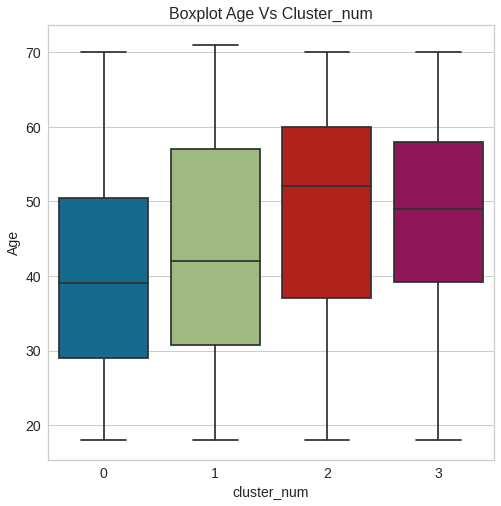

In [ ]:
# box plot for age and cluster_num
plt.figure(figsize=(8,8))
plt.title("Boxplot Age Vs Cluster_num", fontsize=16)
plt.xlabel("cluster_num", fontsize=14)
plt.ylabel("Age", fontsize=14)
plt.tick_params(labelsize=14)
sns.boxplot(x="cluster_num", y="Age", data=data,)

# Selecting (the) Target Segment(s)

In [ ]:
# Calculating the mean
visit = data.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()

like = data.groupby('cluster_num')['Like'].mean()
like = like.to_frame().reset_index()

gender = data.groupby('cluster_num')['Gender'].mean()
gender = gender.to_frame().reset_index()

age = data.groupby('cluster_num')['Age'].mean()
age = age.to_frame().reset_index()

group_data = gender.merge(like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left').merge(age, on='cluster_num', how='left')
group_data

,cluster_num,Gender,Like,VisitFrequency,Age
0,0,0.476780,2.139319,3.845201,39.811146
1,1,0.601724,2.665517,3.946552,43.470690
2,2,0.588816,-1.513158,2.605263,49.006579
3,3,0.430894,-2.634146,2.410569,48.134146


# Target segments

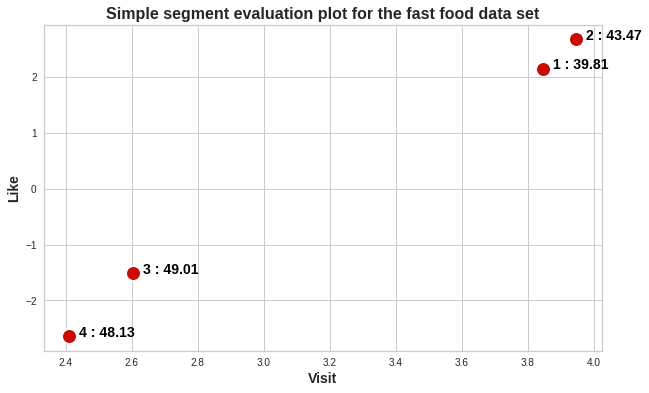

In [ ]:
plt.figure(figsize = (10,6))

sns.scatterplot(x="VisitFrequency", y="Like", data=group_data, s=200, color="r")

plt.title("Simple segment evaluation plot for the fast food data set", fontsize = 16, weight='bold') 
plt.xlabel("Visit", fontsize = 14, weight='bold') 
plt.ylabel("Like", fontsize = 14, weight='bold') 

for i in range(group_data.shape[0]):
  plt.text(x=group_data.VisitFrequency[i]+0.03, y=group_data.Like[i], s=f"{i+1} : {round(group_data.Age[i], 2)}", fontdict=dict(color='black',size=14, weight='bold'))

plt.show()

Market segments 1 and 2 are located in the attractive quadrant of the segment evaluation plot. Members of these two segments like McDonald’s and visit it frequently. The age of the customer in these segments is below 45. These segments need to be retained, and their needs must be satisfied in the future.

Market segment 4 is located in the least attractive position. Members of this segment hate McDonald’s, and rarely eat there, making them unattractive as a potential market segment. The age of the customer in this segment is above 45.

Market segment 3 does not currently perceive McDonald’s in a positive way, and feels that it is expensive.
